In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta
import os

#get working directory in python
os.getcwd()
#change working directory in python
os.chdir("/home/belu/Escritorio/Proyecto_TESIS/reanalysis/BS_otonio")
import funciones as fun


In [3]:
anios = np.array(["1980_03","1984_04","1990_03","1991_04","1996_05","2000_04","2001_03",
                  "2003_03","2007_03","2008_04","2010_05"])

my_data="ERA_interim_reanalisis_" + anios[0] + "_gep_wind_temp_area1.nc"
fh = Dataset(my_data, mode='r')

In [4]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]

time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature
v= fh.variables["v"][:]
u= fh.variables["u"][:]
temp= fh.variables["t"][:]

hgt_units = fh.variables['z'].units
temp_units = fh.variables['t'].units
v_units = fh.variables['v'].units

In [5]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

In [6]:
# PASO 1: Crear una lista de "RGB tuples" (Ver https://es.wikipedia.org/wiki/Colores_web#Tabla_de_colores)
colors = [(255,255,255),(255,255,255),(255, 255, 150),(255, 100 , 50),(255, 10, 10)
          ,( 150, 0, 0),(50, 0 ,0)]

# PASO 2: Crear un "array o "list" de posiciones de 0 a 1 (abarcando el rango de la variable a graficar)
position = [0, 0.166,0.333, 0.4999, 0.6666,0.83333,1]

# PASO 3: Llamar a la funcion "make_cmap" que devuelve el nuevo colormap para luego utilizar en la grafica
cmap_new_r = fun.make_cmap(colors,70, position=position, bit=True)

/home/belu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


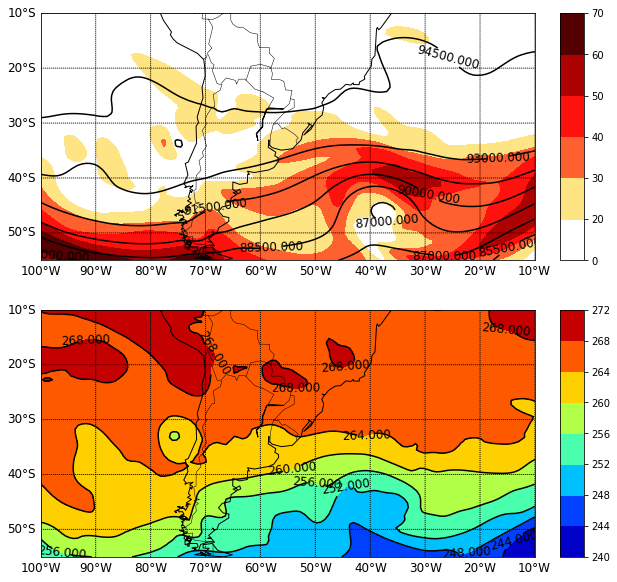

In [21]:
# Plot Data
fig = plt.figure(figsize=(30,10))

#############################################################################################################
ax1 = fig.add_subplot(2,1,1)
# hgt(tiempo, nivel)
cs = m.contour(xi,yi,np.squeeze(hgt[117,0]),colors="black")
plt.clabel(cs, inline=1, fontsize=12)

speed=np.sqrt(u*u+v*v)

#cs1=m.contour(xi,yi,speed[117,0],latlon=True)
#plt.clabel(cs1, inline=1, fontsize=14)

cs2=m.contourf(xi,yi,speed[117,0],levels=[0,20,30,40,50,60,70],cmap=cmap_new_r,latlon=True)


# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=12)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs2 ,location='right', pad="5%")
###############################################################################################################
ax1 = fig.add_subplot(2,1,2,aspect=1.0)

cs = m.contour(xi,yi,np.squeeze(temp[117,1]),colors="black")
plt.clabel(cs, inline=1, fontsize=12)
cs1 = m.contourf(xi,yi,np.squeeze(temp[117,1]),cmap="jet")

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=12)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs1, location='right', pad="5%")
#cbar.set_label(hgt_units)
